# 🧪 Lab 9: Support Vector Machines (SVM) with World Population Data

**Objective**: Use SVM to classify countries into population size categories based on demographic and geographic features.

**Dataset**: World Population Dataset from Kaggle  
Link: https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset

**Theory**:
- Support Vector Machines (SVM) are supervised learning models used for classification and regression.
- SVM finds the optimal hyperplane that separates classes with the maximum margin.
- It can use kernel functions to handle non-linear boundaries.
- Feature scaling is essential because SVM relies on distance calculations.
- Common kernels include linear, polynomial, and RBF (radial basis function).

In [38]:
# 📦 Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 📥 Step 2: Load the dataset
This dataset includes country-level features such as population, area, density, growth rate, and fertility rate.

In [39]:
# Load the dataset
df = pd.read_csv("world_population.csv")
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


## 🧠 Step 3: Create population categories
We'll classify countries into three categories based on population size:
- Low: < 10 million
- Medium: 10–100 million
- High: > 100 million

In [41]:
# Convert population string to numeric
df['2022 Population'] = df['2022 Population'].astype(float)

# Create population category
def categorize(pop):
    x=0
    if pop < 1e7:
        return 'Low'
    else:
        return 'Medium'


df['Pop_Category'] = df['2022 Population'].apply(categorize)
df['Pop_Label'] = df['Pop_Category'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [32]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Pop_Category,Pop_Label
0,36,AFG,Afghanistan,Kabul,Asia,41128771.0,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,Medium,1
1,138,ALB,Albania,Tirana,Europe,2842321.0,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,Low,0
2,34,DZA,Algeria,Algiers,Africa,44903225.0,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,Medium,1
3,213,ASM,American Samoa,Pago Pago,Oceania,44273.0,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,Low,0
4,203,AND,Andorra,Andorra la Vella,Europe,79824.0,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,Low,0


## 🧹 Step 4: Preprocess the data
We select relevant features and scale them for SVM.

In [42]:
# Select features
features = ['Area (km²)', 'Density (per km²)', 'Growth Rate']
X = df[features]
y = df['Pop_Label']

# Handle missing values
X = X.fillna(X.mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42)

## 🧪 Step 5: Train the SVM classifier
We use the RBF kernel and evaluate performance.

In [51]:
# Train SVM model
# kernel='linear', 'poly', or 'sigmoid' , 'rbf'

svm = SVC(kernel='sigmoid', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Predict
y_pred = svm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6808510638297872

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        53
           1       0.68      0.51      0.58        41

    accuracy                           0.68        94
   macro avg       0.68      0.66      0.66        94
weighted avg       0.68      0.68      0.67        94



## 📊 Step 6: Visualize the confusion matrix
This shows how well the model distinguishes between population categories.

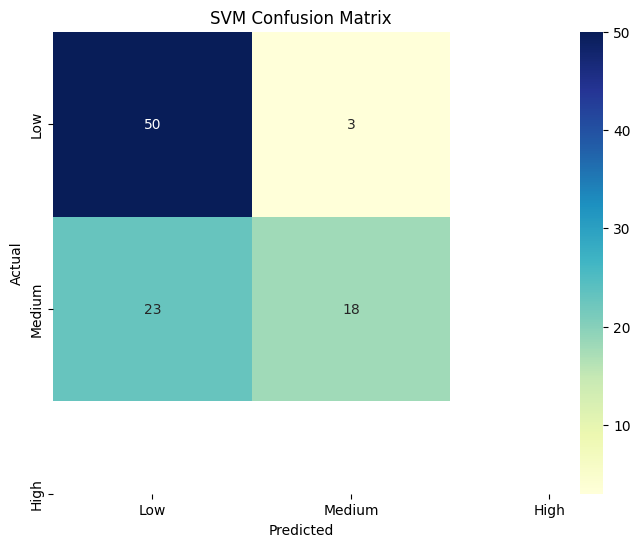

In [47]:
# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🔍 Step 7: Try different kernel functions
Try changing `kernel='linear'`, `'poly'`, or `'sigmoid'` and observe how performance changes.

## 📝 Reflection Questions

1. What does the SVM decision boundary represent in this context?
2. How does the choice of kernel affect classification?
3. Why is feature scaling critical for SVM?
4. How could this model be used to support global development or resource planning?